## Convolution

In [48]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
# Rama Dinantiar (202331044)

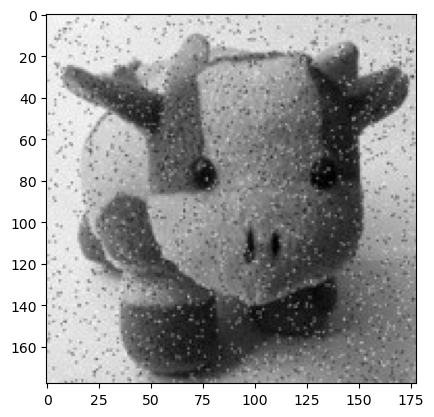

In [50]:
# Membaca Gambar dan Propertiny
img = cv.imread("boneka.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")
plt.imshow(img_gray, cmap="gray")
# Rama Dinantiar (202331044)

## Membuat Kernel Deteksi Tepi (Filter Batas)

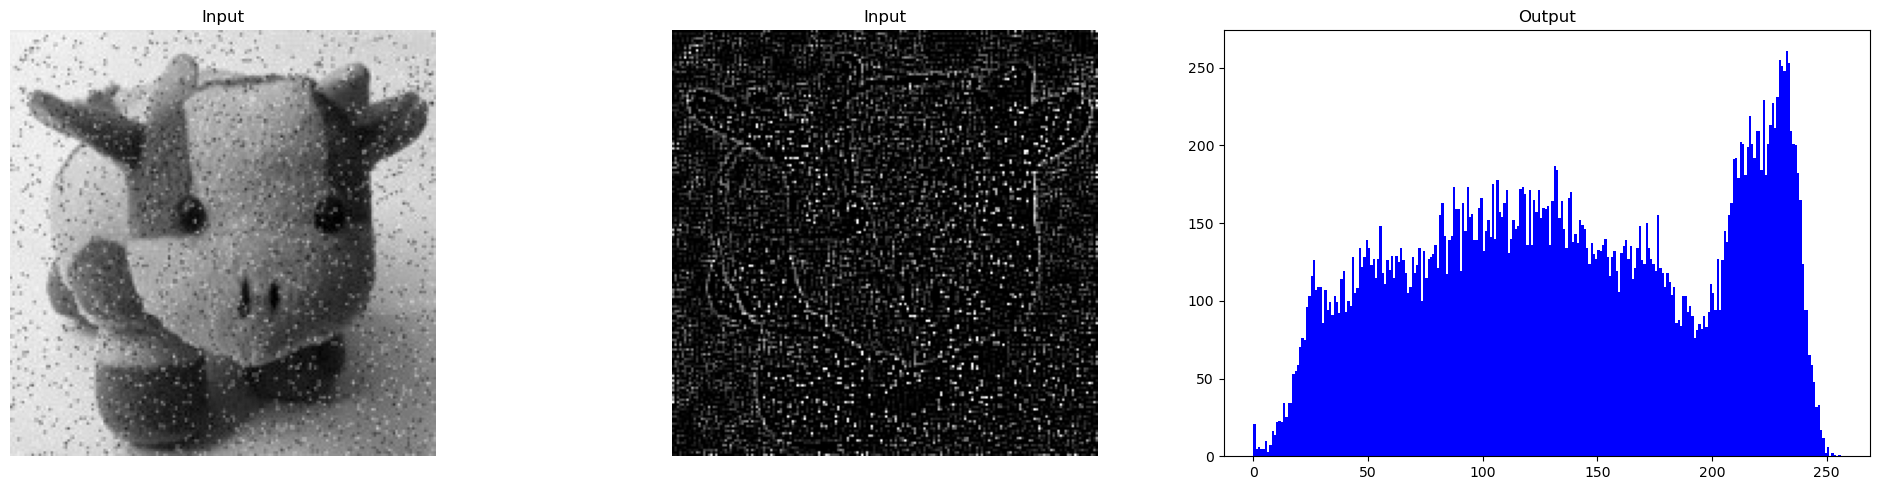

In [53]:
kernel = np.array(
    [
        [-1,0,-1],
        [0,4,0],
        [-1,0,-1]
    ]
)

img_output = cv.filter2D(img_gray, -1, kernel)

fig, axs = plt.subplots(1,3, figsize=(20,5))
ax = axs.ravel()

ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title("Input")
ax[0].axis('off')

ax[1].imshow(img_output, cmap='gray')
ax[1].set_title("Input")
ax[1].axis('off')

ax[2].hist(img_gray.ravel(), bins=256, range=(0,256), color='blue')
ax[2].set_title("Output")

plt.tight_layout()
plt.show()
# Rama Dinantiar (202331044)

## Menambahkan Noise (Salt & Pepper, Gaussian, Speckle) dan Menampilkannya

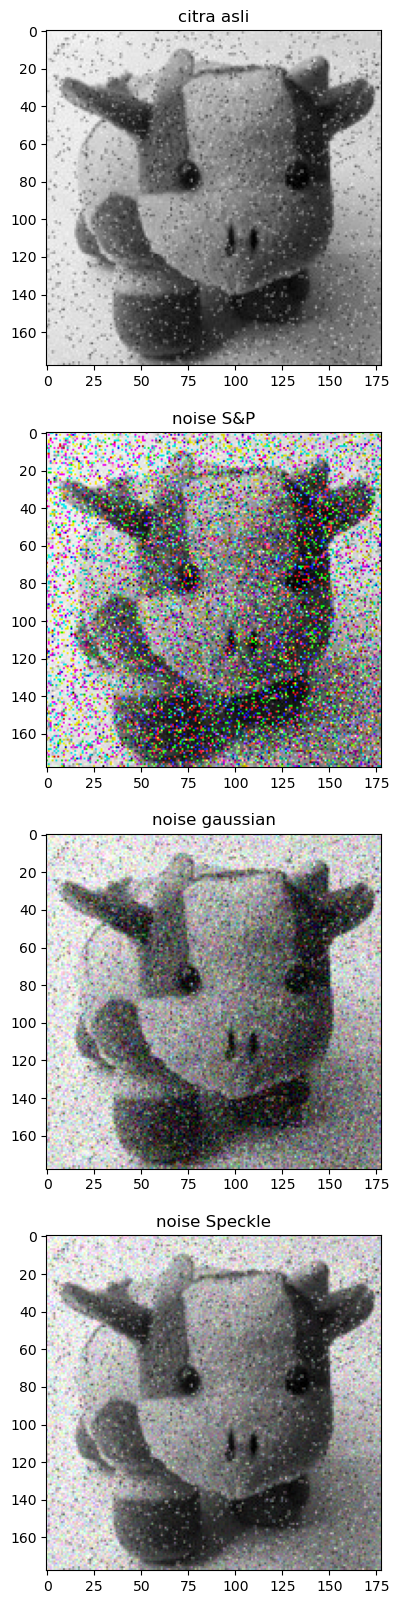

In [85]:
from skimage.util import random_noise

#baca properti gambar
img2 = cv.imread("boneka.jpg")

#fungsi skimage untuk random noise
noise_img_snp = random_noise(img2, mode='s&p', amount=0.2)
noise_img_gaussian = random_noise(img2, mode='gaussian', mean=0, var=0.01)
noise_img_speckle = random_noise(img2, mode='speckle')

noise_img_snp = np.array(255*noise_img_snp, dtype='uint8')
noise_img_gaussian = np.array(255*noise_img_gaussian, dtype='uint8')
noise_img_speckle = np.array(255*noise_img_speckle, dtype='uint8')

#config plot dan axis untuk tampilan, menampilkan dalam versi plot dengan color map gray
fig, axs = plt.subplots(4,1, figsize=(10,20))
ax = axs.ravel()

ax[0].imshow(img2, cmap='gray')
ax[0].set_title('citra asli')

ax[1].imshow(noise_img_snp, cmap='gray')
ax[1].set_title('noise S&P')

ax[2].imshow(noise_img_gaussian, cmap='gray')
ax[2].set_title('noise gaussian')

ax[3].imshow(noise_img_speckle, cmap='gray')
ax[3].set_title('noise Speckle')

plt.show()
# Rama Dinantiar (202331044)

## Membuat Kernel 3x3 untuk Filter Rata-Rata

In [59]:
#membuat kernel 3*3 yang bernilai 1/9
# image reduction
kernel_3_3 = np.ones((3,3), np.float32)/9
# Rama Dinantiar (202331044)

### Filter Rata-Rata dan Median untuk Noise Salt & Pepper

In [62]:
#melakukan konvolusi untuk mengatasi noise salt and pepper dengan function filter 2D dan medianBlur
img_snp_avg_filter = cv.filter2D(noise_img_snp, cv.CV_8U, kernel_3_3,
                                 (-1,1), delta=0,
                                 borderType = cv.BORDER_DEFAULT)
img_snp_median_filter = cv.medianBlur(noise_img_snp, 3)
# Rama Dinantiar (202331044)

### Filter Rata-Rata dan Median untuk Noise Gaussian

In [67]:
#melakukan konvolusi untuk mengatasi noise gaussian dengan function filter 2D dan medianBlur
img_gaussian_avg_filter = cv.filter2D(noise_img_gaussian, cv.CV_8U, kernel_3_3,
                                 (-1,1), delta=0,
                                 borderType = cv.BORDER_DEFAULT)
img_gaussian_median_filter = cv.medianBlur(noise_img_speckle, 3)
# Rama Dinantiar (202331044)

### Filter Rata-Rata dan Median untuk Noise Speckle

In [70]:
#melakukan konvolusi untuk mengatasi noise speckle dengan function filter 2D dan medianBlur
img_speckle_avg_filter = cv.filter2D(noise_img_speckle, cv.CV_8U, kernel_3_3,
                                 (-1,1), delta=0,
                                 borderType = cv.BORDER_DEFAULT)
img_speckle_median_filter = cv.medianBlur(noise_img_speckle, 3)
# Rama Dinantiar (202331044)

## Menampilkan Hasil Filter pada Berbagai Jenis Noise

Text(0.5, 1.0, 'Median Filter Speckle Reduction')

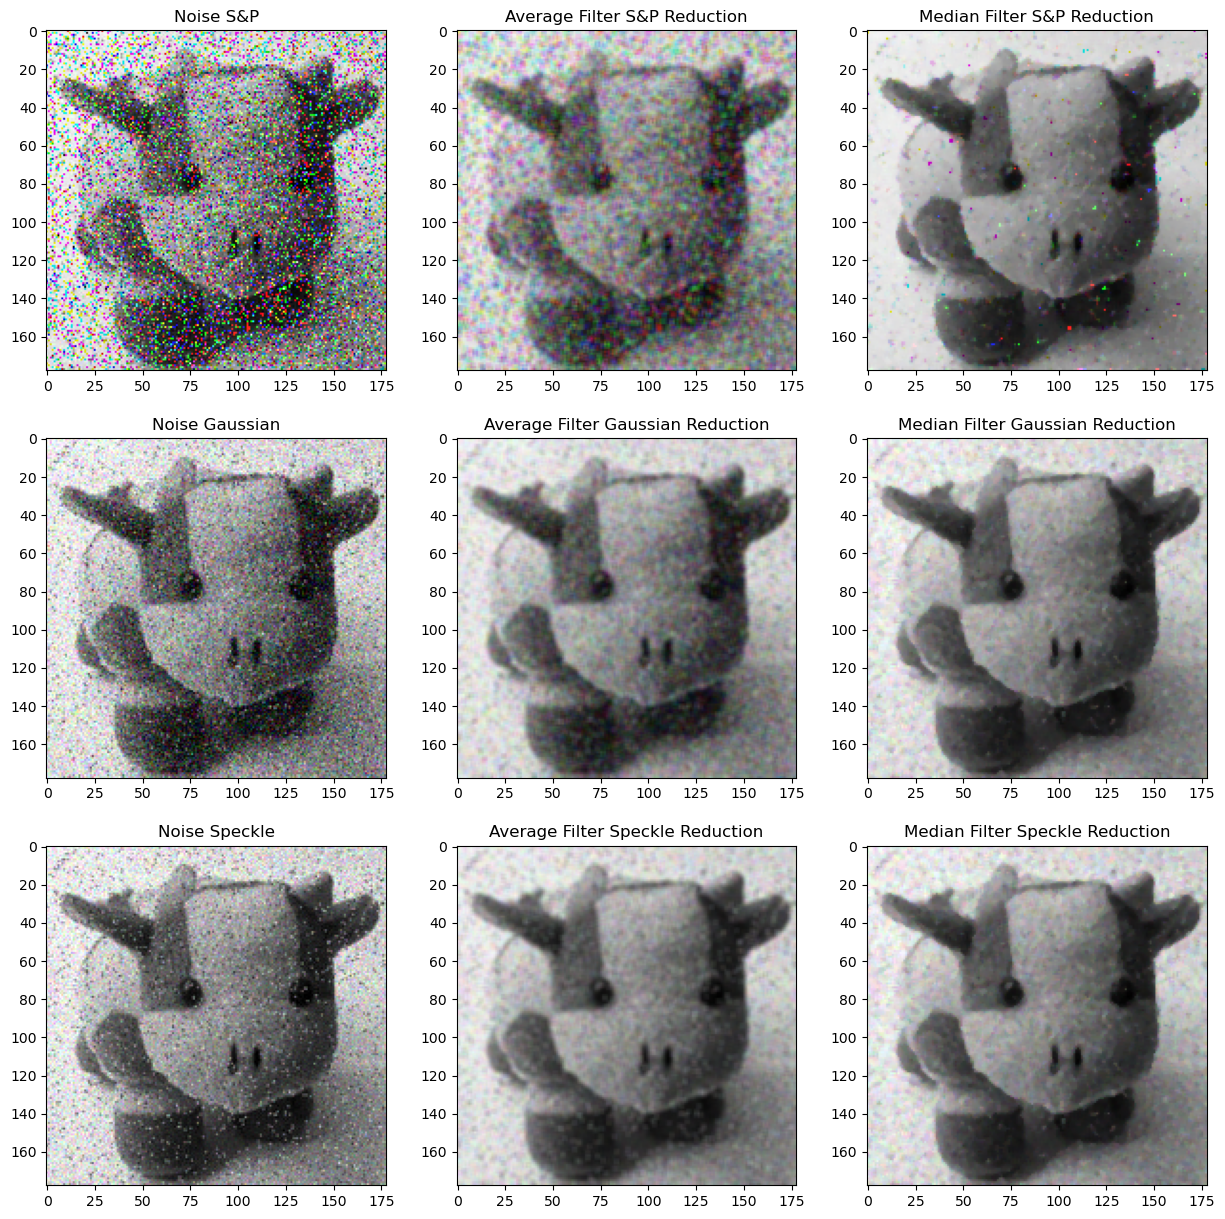

In [73]:
# menampilkan perbandingan hasil
fig, axs = plt.subplots(3,3, figsize = (15,15))
ax = axs.ravel()

# noise salt and pepper
ax[0].imshow(noise_img_snp)
ax[0].set_title('Noise S&P')

ax[1].imshow(img_snp_avg_filter)
ax[1].set_title('Average Filter S&P Reduction')

ax[2].imshow(img_snp_median_filter)
ax[2].set_title('Median Filter S&P Reduction')

# noise gussian
ax[3].imshow(noise_img_gaussian)
ax[3].set_title('Noise Gaussian')

ax[4].imshow(img_gaussian_avg_filter)
ax[4].set_title('Average Filter Gaussian Reduction')

ax[5].imshow(img_gaussian_median_filter)
ax[5].set_title('Median Filter Gaussian Reduction')

# noise speckle
ax[6].imshow(noise_img_speckle)
ax[6].set_title('Noise Speckle')

ax[7].imshow(img_speckle_avg_filter)
ax[7].set_title('Average Filter Speckle Reduction')

ax[8].imshow(img_speckle_median_filter)
ax[8].set_title('Median Filter Speckle Reduction')
# Rama Dinantiar (202331044)